In [1]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999

<IPython.core.display.Javascript object>

In [2]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# Exploration des données

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
path = "heart.csv"
df = pd.read_csv(path, encoding = "ISO-8859-1")

In [5]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


<AxesSubplot:>

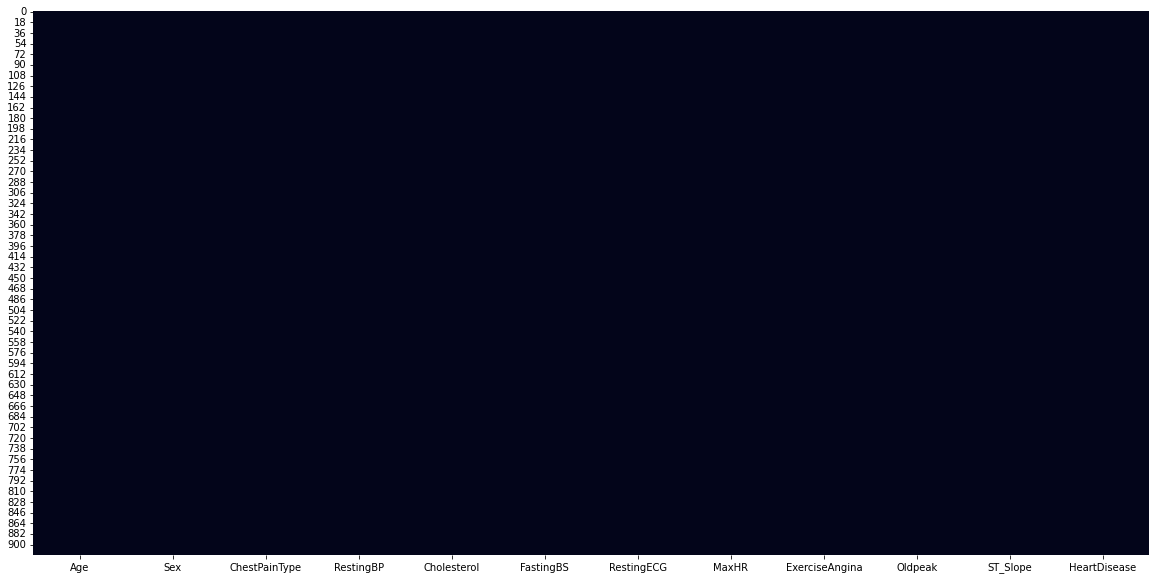

In [6]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

### Examen de la colonne target

In [7]:
df['HeartDisease'].value_counts(normalize=True)

1    0.553377
0    0.446623
Name: HeartDisease, dtype: float64

In [8]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

### histogrames des variables continues 

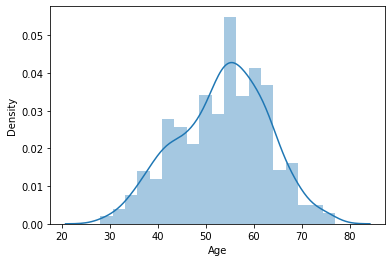

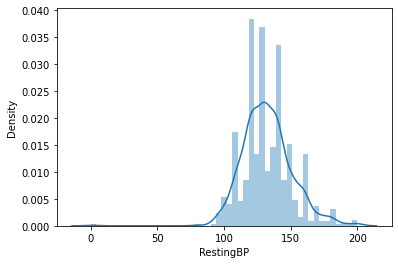

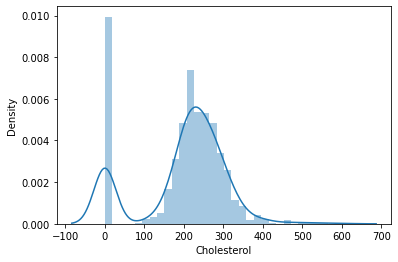

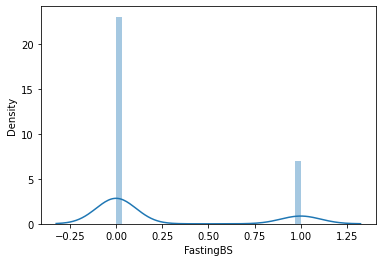

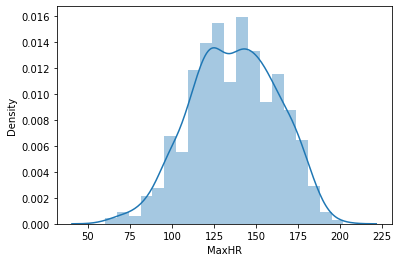

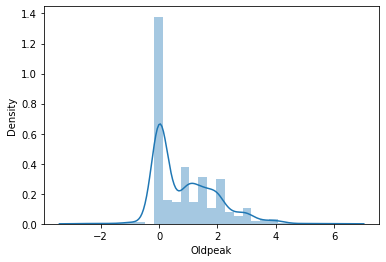

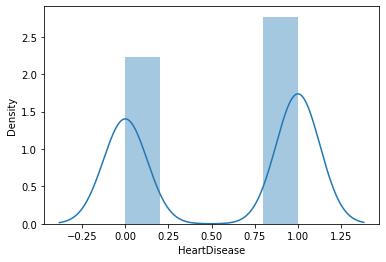

In [9]:
for col in df.select_dtypes(['float','int64']):
    plt.figure()
    sns.distplot(df[col])

In [10]:
for col in df.select_dtypes('object'):
    print(f'{col :-<50} {df[col].unique()}')

Sex----------------------------------------------- ['M' 'F']
ChestPainType------------------------------------- ['ATA' 'NAP' 'ASY' 'TA']
RestingECG---------------------------------------- ['Normal' 'ST' 'LVH']
ExerciseAngina------------------------------------ ['N' 'Y']
ST_Slope------------------------------------------ ['Up' 'Flat' 'Down']


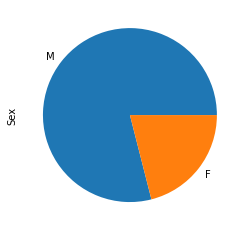

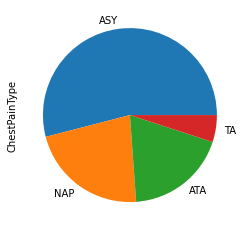

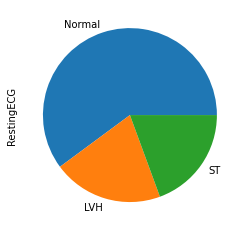

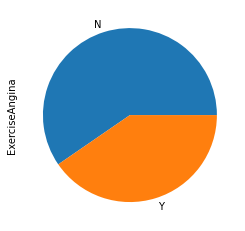

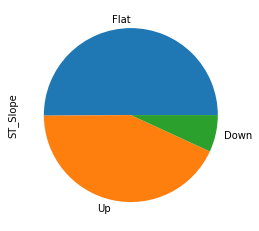

In [11]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie()

In [12]:
heart_disease = df[df['HeartDisease'] == 1]
normal_heart = df[df['HeartDisease'] == 0]

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


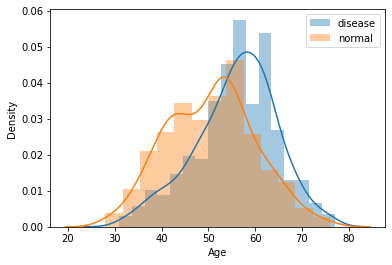

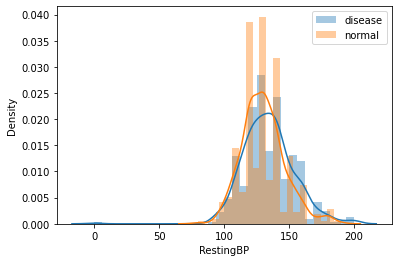

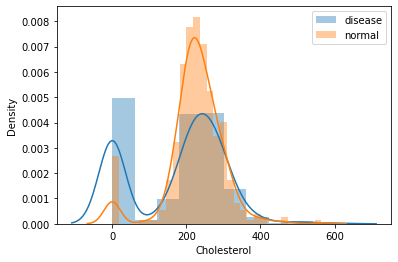

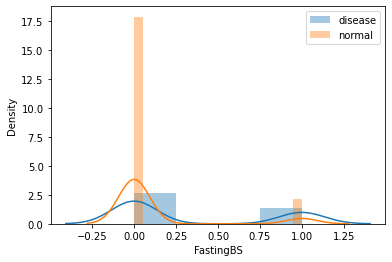

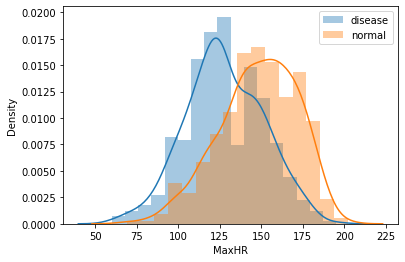

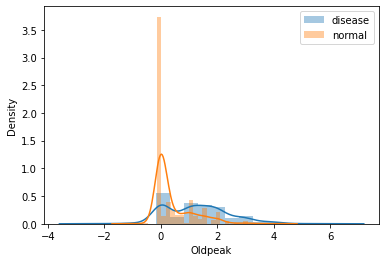

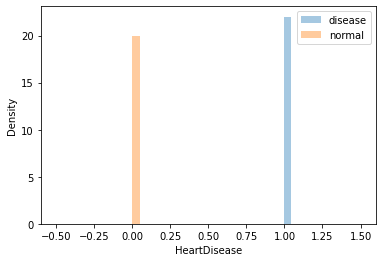

In [13]:
for col in df.select_dtypes(['float','int64']):
    plt.figure()
    sns.distplot(heart_disease[col], label='disease')
    sns.distplot(normal_heart[col], label='normal')
    plt.legend()

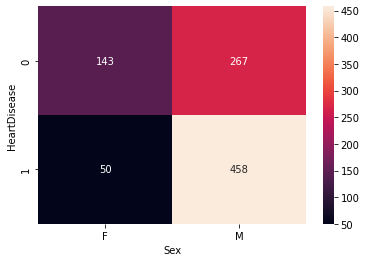

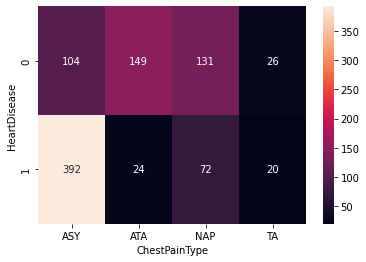

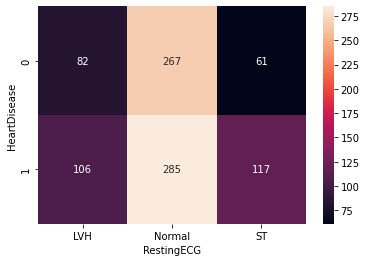

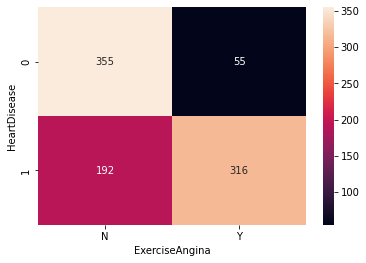

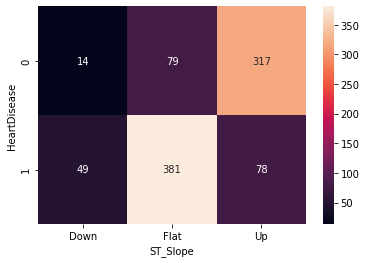

In [14]:
for col in df.select_dtypes('object'):
    plt.figure()
    sns.heatmap(pd.crosstab(df['HeartDisease'], df[col]), annot=True, fmt='d')

## Analyse un peu plus Avancée
### Relation Variables / Variables
### relations Taux Sanguin

In [15]:
df.head(100)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,58,M,ASY,130,263,0,Normal,140,Y,2.0,Flat,1
96,43,M,ATA,142,207,0,Normal,138,N,0.0,Up,0
97,39,M,NAP,160,147,1,Normal,160,N,0.0,Up,0
98,56,M,ASY,120,85,0,Normal,140,N,0.0,Up,0


<Figure size 432x288 with 0 Axes>

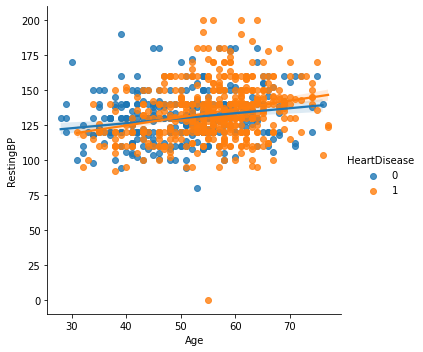

<Figure size 432x288 with 0 Axes>

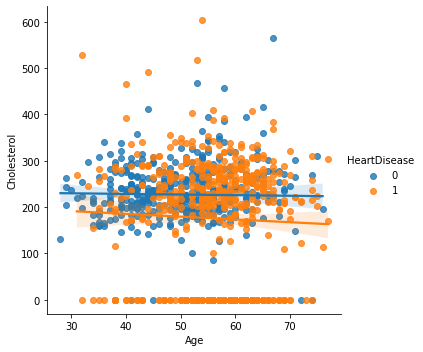

<Figure size 432x288 with 0 Axes>

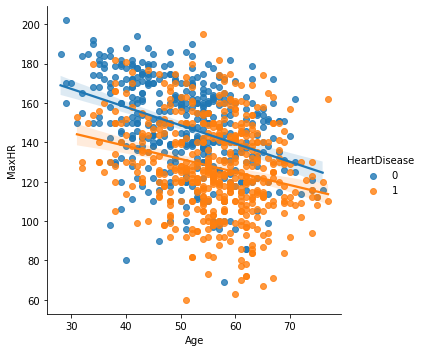

<Figure size 432x288 with 0 Axes>

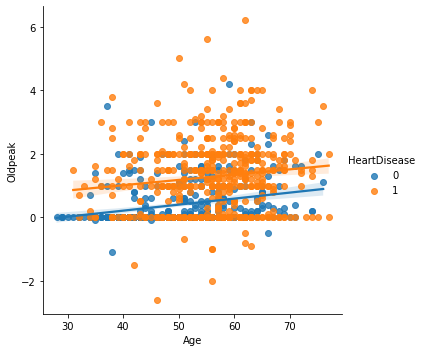

In [16]:
blood_columns=['RestingBP','Cholesterol','MaxHR','Oldpeak']
for col in blood_columns:
    plt.figure()
    sns.lmplot(x='Age', y=col, hue='HeartDisease', data=df)


In [17]:
from scipy.stats import ttest_ind

### hypotheses nulle (H0): 

- Les individus atteints d'une insufisance cardiaque ont des taux de RestingBP, Cholesterol, MaxHR et Oldpeak significativement différents
    - H0 = Les taux moyens sont ÉGAUX chez les individus malades et  et non malade.

    - H1 = Les individus atteints d'une quelconque maladie ont des taux significativement différents

In [18]:
balanced_disease = heart_disease.sample(normal_heart.shape[0])

In [19]:
def t_test(col):
    alpha = 0.02
    stat, p = ttest_ind(balanced_disease[col].dropna(), normal_heart[col].dropna())
    if p < alpha:
        return 'H0 Rejetée'
    else :
        return 0

In [20]:
for col in blood_columns:
    print(f'{col :-<50} {t_test(col)}')

RestingBP----------------------------------------- H0 Rejetée
Cholesterol--------------------------------------- H0 Rejetée
MaxHR--------------------------------------------- H0 Rejetée
Oldpeak------------------------------------------- H0 Rejetée


## TrainTest - Nettoyage - Encodage

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from datetime import datetime
from sklearn.preprocessing import RobustScaler

In [22]:
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)

In [23]:
categorical_cols= df.select_dtypes('object').columns
categorical_cols

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [24]:
enc = OneHotEncoder(handle_unknown='ignore')
transformed_trainset = enc.fit_transform(trainset[categorical_cols]).toarray()
transformed_testset = enc.transform(testset[categorical_cols]).toarray()
# the above transformed_data is an array so convert it to dataframe
encoded_data_trainset = pd.DataFrame(transformed_trainset, index=trainset.index)
encoded_data_testset = pd.DataFrame(transformed_testset, index=testset.index)

# now concatenate the original data and the encoded data using pandas
trainset = pd.concat([trainset, encoded_data_trainset], axis=1)
trainset = trainset.drop(categorical_cols,axis=1)
  

testset = pd.concat([testset, encoded_data_testset], axis=1)
testset=testset.drop(categorical_cols,axis=1)  

In [25]:
X_train = trainset.drop('HeartDisease', axis=1)
y_train = trainset['HeartDisease']

X_test = testset.drop('HeartDisease', axis=1)
y_test = testset['HeartDisease']

In [26]:
rbst=RobustScaler()
X_train.iloc[:,:6] = rbst.fit_transform(X_train.iloc[:,:6])
X_test.iloc[:,:6] = rbst.transform(X_test.iloc[:,:6])

# Modellisation

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

In [28]:
model_1 = RandomForestClassifier(random_state=0)

## Procédure d'évaluation

In [29]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [30]:
def evaluation(model):
    
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

[[62 15]
 [11 96]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        77
           1       0.86      0.90      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.85      0.85       184
weighted avg       0.86      0.86      0.86       184



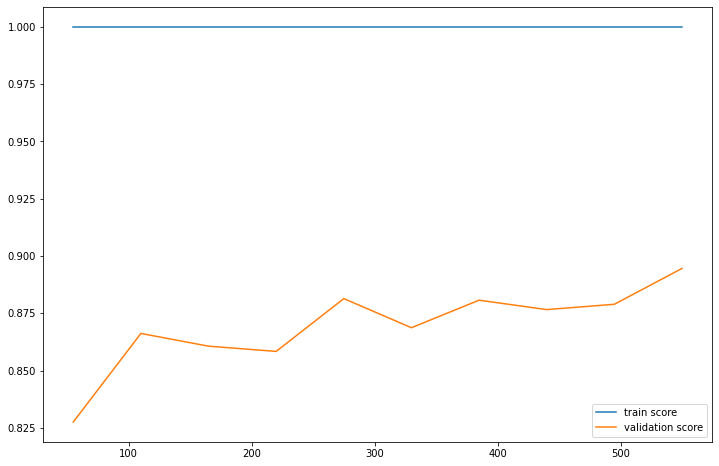

In [31]:
evaluation(model_1)

In [32]:
from sklearn.feature_selection import SelectKBest, chi2

<AxesSubplot:>

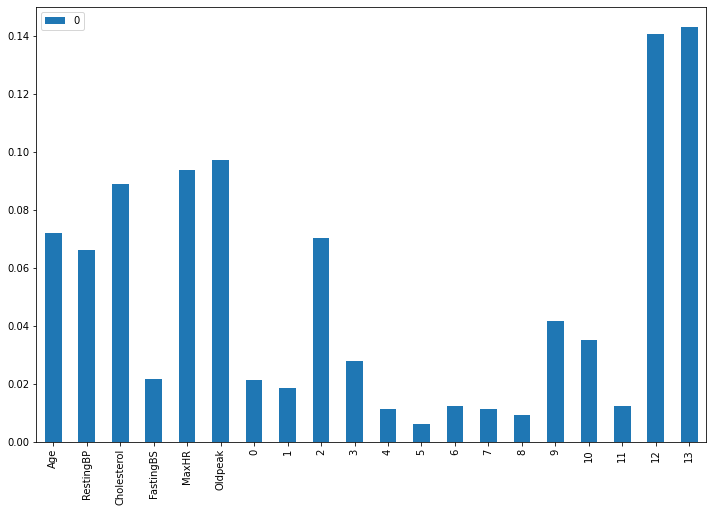

In [33]:
pd.DataFrame(model_1.feature_importances_, index=X_train.columns).plot.bar(figsize=(12, 8))

# Modelisation
## sans Polynomial features

In [34]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
# from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingRegressor
from sklearn.svm import SVC,LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve,GridSearchCV,RandomizedSearchCV



In [35]:
# RandomForest = make_pipeline( RandomForestClassifier(random_state=0))
# AdaBoost = make_pipeline( AdaBoostClassifier(random_state=0))
# SVM = make_pipeline( RobustScaler(), SVC(random_state=0))
# KNN = make_pipeline( RobustScaler(), KNeighborsClassifier())



RandomForest=RandomForestClassifier(random_state=0)
adaBoost=AdaBoostClassifier(random_state=0)
SVM=make_pipeline(StandardScaler(),SVC(random_state=0))
KNN=make_pipeline(StandardScaler(),KNeighborsClassifier())
Linear_SVC=make_pipeline(StandardScaler(),LinearSVC())
Logistic_Regression=make_pipeline(StandardScaler(),LogisticRegression())
Perceptron_=make_pipeline(StandardScaler(),Perceptron())
MLP_Classifier=make_pipeline(StandardScaler(),MLPClassifier())



In [36]:
dict_of_models = {'RandomForest':RandomForest,
                'adaBoost':adaBoost,
                'SVM':SVM,
                'KNN':KNN,
                'LinearSVC':Linear_SVC,
                'LogisticRegression':Logistic_Regression,
                'Perceptron':Perceptron_,
                'MLPClassifier':MLP_Classifier
                 }

RandomForest
[[62 15]
 [11 96]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        77
           1       0.86      0.90      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.85      0.85       184
weighted avg       0.86      0.86      0.86       184

adaBoost
[[60 17]
 [12 95]]
              precision    recall  f1-score   support

           0       0.83      0.78      0.81        77
           1       0.85      0.89      0.87       107

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.84       184
weighted avg       0.84      0.84      0.84       184

SVM
[[61 16]
 [10 97]]
              precision    recall  f1-score   support

           0       0.86      0.79      0.82        77
           1       0.86      0.91      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.85      0.85  

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  

LogisticRegression
[[56 21]
 [11 96]]
              precision    recall  f1-score   support

           0       0.84      0.73      0.78        77
           1       0.82      0.90      0.86       107

    accuracy                           0.83       184
   macro avg       0.83      0.81      0.82       184
weighted avg       0.83      0.83      0.82       184

Perceptron
[[54 23]
 [18 89]]
              precision    recall  f1-score   support

           0       0.75      0.70      0.72        77
           1       0.79      0.83      0.81       107

    accuracy                           0.78       184
   macro avg       0.77      0.77      0.77       184
weighted avg       0.78      0.78      0.78       184

MLPClassifier


c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[[64 13]
 [ 9 98]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.85        77
           1       0.88      0.92      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.88       184
weighted avg       0.88      0.88      0.88       184



c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the 

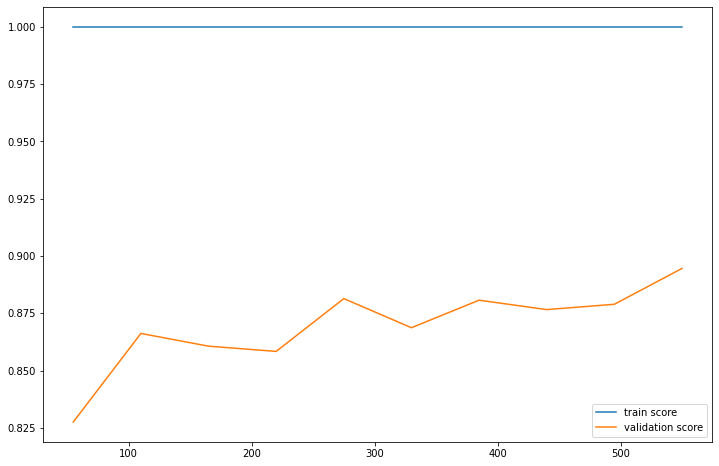

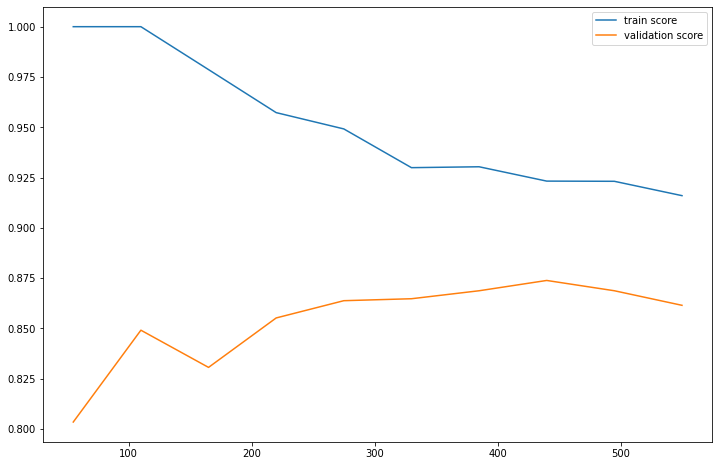

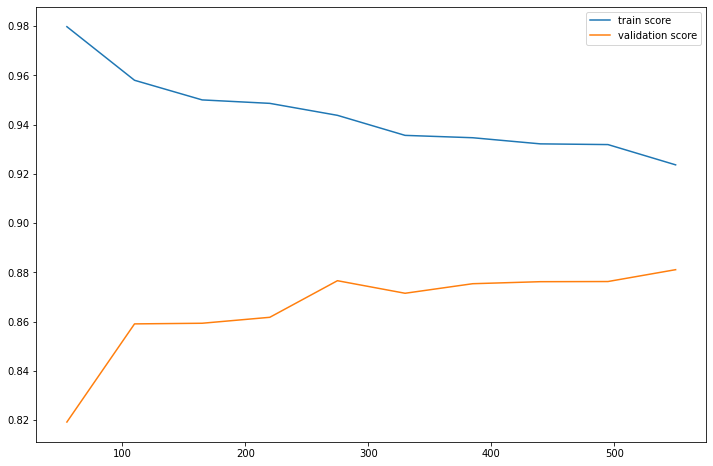

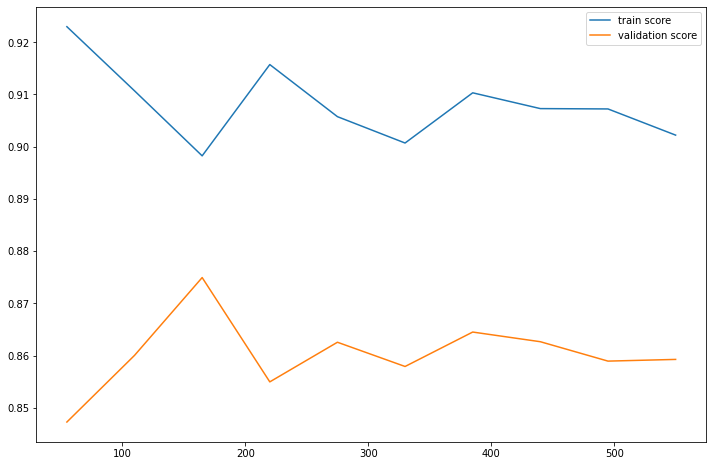

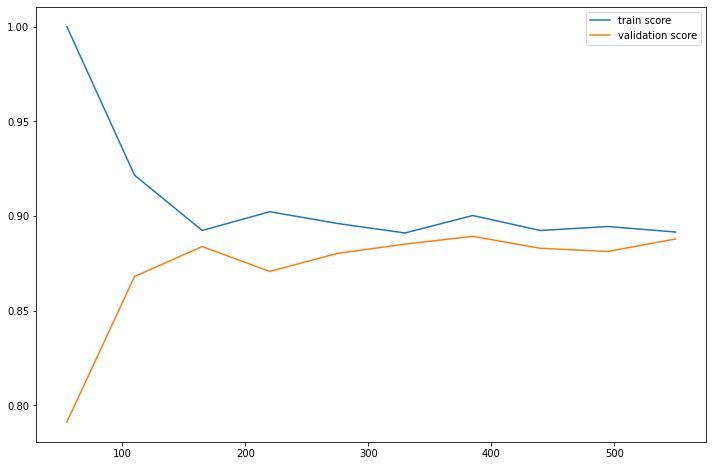

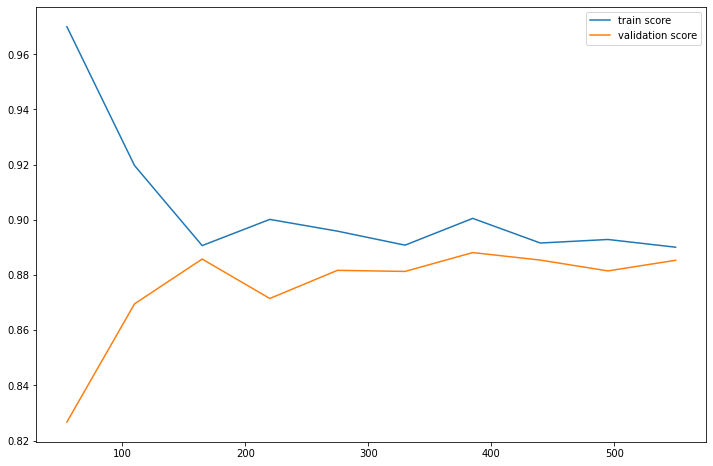

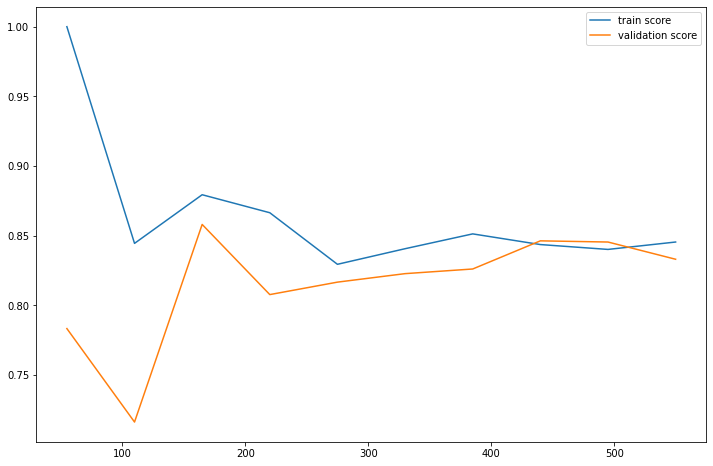

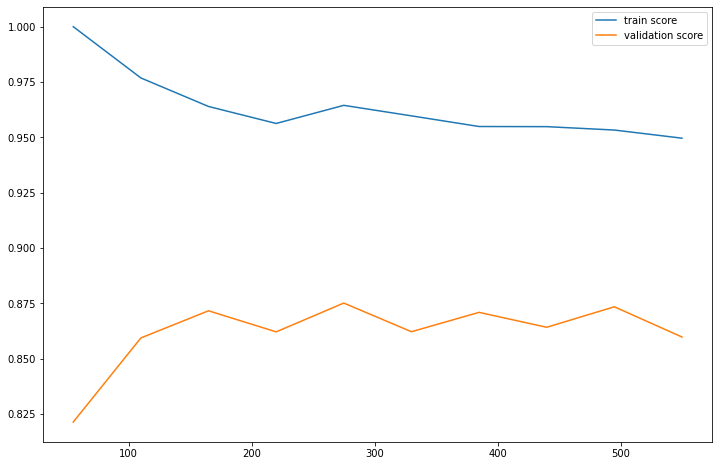

In [37]:
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)

## amelioration de rondomForest

In [38]:
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(f_classif, k=5))

In [39]:
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))

In [40]:
# Nombre d'arbres dans la forêt aléatoire 
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)] 
max_features = ['auto', 'sqrt'] 
# Nombre d'entités à considérer à chaque fractionnement 
# Nombre maximum de niveaux dans l'arbre 
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)] 
max_depth.append(None) 
# Nombre minimum d'échantillons requis pour diviser un nœud 
min_samples_split = [2, 5, 10] 
# # Nombre minimum d'échantillons requis à chaque nœud feuille 
min_samples_leaf = [1, 2, 4] 
# # Méthode de sélection des échantillons pour former chaque arbre 
bootstrap = [True, False]
# # Créer la grille aléatoire 
random_grid = {'randomforestclassifier__n_estimators' : n_estimators, 
               'randomforestclassifier__max_depth' : max_depth, 
               'randomforestclassifier__min_samples_split' : min_samples_split, 
               'randomforestclassifier__min_samples_leaf' : min_samples_leaf, 
               'randomforestclassifier__bootstrap' : bootstrap,
               'pipeline__polynomialfeatures__degree':[1,2, 3, 4,5],
               'pipeline__selectkbest__k': range(3, 12)
            }

In [41]:
# Utilisez la grille aléatoire pour rechercher les meilleurs hyperparamètres 
# Créez d'abord le modèle de base pour régler 

rf = RandomForest
rf_random = RandomizedSearchCV (estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 4, random_state=0,scoring='recall', verbose=2, n_jobs = -1)
# Ajuster le modèle de recherche aléatoire 
rf_random.fit(X_train, y_train)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [  126   153   154 ... 53125 53126 53127] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


RandomizedSearchCV(cv=4,
                   estimator=Pipeline(steps=[('pipeline',
                                              Pipeline(steps=[('polynomialfeatures',
                                                               PolynomialFeatures(include_bias=False)),
                                                              ('selectkbest',
                                                               SelectKBest(k=5))])),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(random_state=0))]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'pipeline__polynomialfeatures__degree': [2,
                                                                                 3,
                                                                                 4,
                                                                                 5],
                         

In [42]:
print(rf_random.best_params_)

y_pred = rf_random.predict(X_test)

print(classification_report(y_test, y_pred))

{'randomforestclassifier__n_estimators': 1800, 'randomforestclassifier__min_samples_split': 5, 'randomforestclassifier__min_samples_leaf': 2, 'randomforestclassifier__max_depth': 30, 'randomforestclassifier__bootstrap': False, 'pipeline__selectkbest__k': 7, 'pipeline__polynomialfeatures__degree': 5}
              precision    recall  f1-score   support

           0       0.79      0.68      0.73        77
           1       0.79      0.87      0.83       107

    accuracy                           0.79       184
   macro avg       0.79      0.77      0.78       184
weighted avg       0.79      0.79      0.79       184



c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [  126   153   154 ... 53125 53126 53127] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


[[52 25]
 [14 93]]
              precision    recall  f1-score   support

           0       0.79      0.68      0.73        77
           1       0.79      0.87      0.83       107

    accuracy                           0.79       184
   macro avg       0.79      0.77      0.78       184
weighted avg       0.79      0.79      0.79       184



c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   84   126   153 ... 53125 53126 53127] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [  126   153   154 ... 53125 53126 53127] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
c:\Users\LENOV

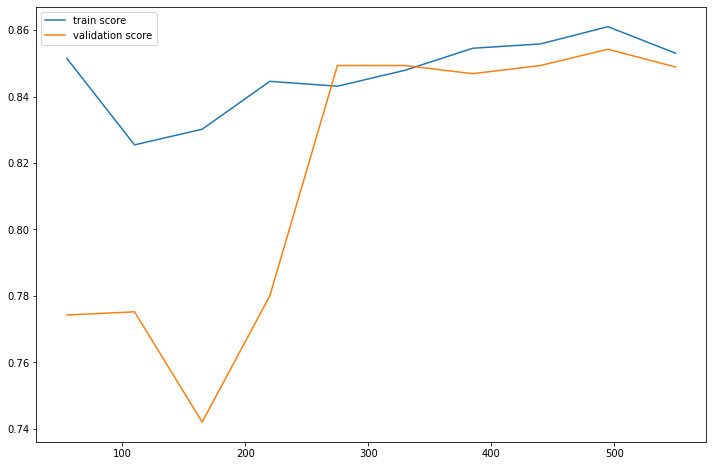

In [43]:
evaluation(rf_random.best_estimator_)

## amelioration LinearSVC

In [123]:
Linear_SVC=make_pipeline(StandardScaler(),LinearSVC())


In [221]:
param_grid = {
               'linearsvc__penalty':['l1', 'l2'],
              'linearsvc__C':[0.01,0.1,1,10,100],
              }

In [222]:
grid = GridSearchCV(Linear_SVC, param_grid, scoring='recall', cv=4
                         ,n_jobs = -1 )

grid.fit(X_train, y_train)

print(grid.best_params_)

y_pred = grid.predict(X_test)

print(classification_report(y_test, y_pred))

{'linearsvc__C': 1, 'linearsvc__penalty': 'l2'}
              precision    recall  f1-score   support

           0       0.84      0.74      0.79        77
           1       0.83      0.90      0.86       107

    accuracy                           0.83       184
   macro avg       0.83      0.82      0.82       184
weighted avg       0.83      0.83      0.83       184



c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\li

[[57 20]
 [11 96]]
              precision    recall  f1-score   support

           0       0.84      0.74      0.79        77
           1       0.83      0.90      0.86       107

    accuracy                           0.83       184
   macro avg       0.83      0.82      0.82       184
weighted avg       0.83      0.83      0.83       184



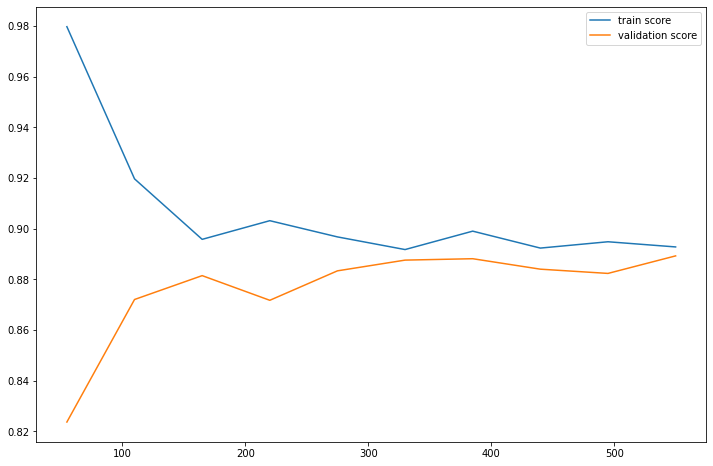

In [128]:
evaluation(grid.best_estimator_)

# Amelioration KNN

In [ ]:
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,StackingClassifier

In [137]:
KNN=make_pipeline(preprocessor,StandardScaler(),KNeighborsClassifier())


In [138]:
grid_params = {'kneighborsclassifier__weights' : ['uniform','distance'],
               'kneighborsclassifier__metric' : ['minkowski','euclidean','manhattan'],
               'kneighborsclassifier__algorithm': ['ball_tree','kd_tree','brute'],
                'pipeline__polynomialfeatures__degree':[1,2, 3, 4,5],
               'pipeline__selectkbest__k': range(3, 12)
               }

In [139]:
gs=GridSearchCV(KNN,grid_params,verbose = 1, cv=4, n_jobs = -1)
gs.fit(X_train,y_train)
print(gs.best_params_)
y_pred=gs.predict(X_test)
print(classification_report(y_test,y_pred))

Fitting 4 folds for each of 810 candidates, totalling 3240 fits
{'kneighborsclassifier__algorithm': 'brute', 'kneighborsclassifier__metric': 'minkowski', 'kneighborsclassifier__weights': 'distance', 'pipeline__polynomialfeatures__degree': 2, 'pipeline__selectkbest__k': 9}
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        77
           1       0.84      0.84      0.84       107

    accuracy                           0.82       184
   macro avg       0.81      0.81      0.81       184
weighted avg       0.82      0.82      0.82       184



c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [126 153 154 155 165 166 176 195 196 203 216 225 226 228] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [141]:
print(gs.best_params_)

{'kneighborsclassifier__algorithm': 'brute', 'kneighborsclassifier__metric': 'minkowski', 'kneighborsclassifier__weights': 'distance', 'pipeline__polynomialfeatures__degree': 2, 'pipeline__selectkbest__k': 9}


c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [126 153 154 155 165 166 176 195 196 203 216 225 226 228] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 84 126 153 154 155 165 166 172 176 177 179 181 182 191 195 196 203 216
 225 226 228] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid va

[[60 17]
 [17 90]]
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        77
           1       0.84      0.84      0.84       107

    accuracy                           0.82       184
   macro avg       0.81      0.81      0.81       184
weighted avg       0.82      0.82      0.82       184



c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 80 126 136 153 154 155 165 166 171 176 182 186 191 195 196 199 203 216
 225 226 228] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 80 126 153 154 155 165 166 176 182 195 196 203 216 225 226 228] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: in

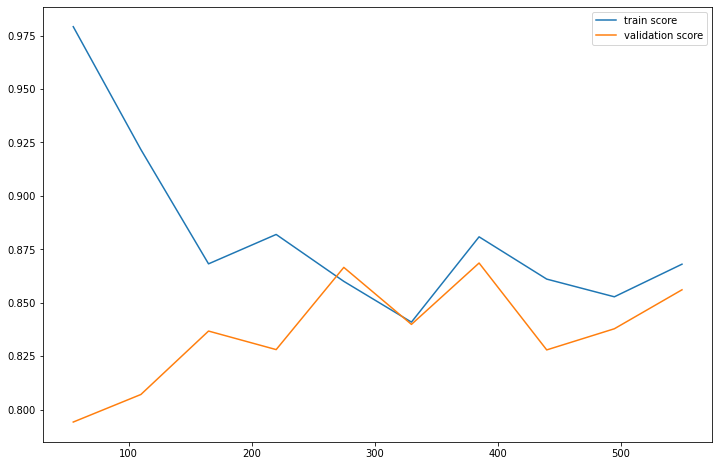

In [142]:
evaluation(gs.best_estimator_)

# stacking
combiner au mieux les prédictions de deux ou plusieurs algorithmes d'apprentissage automatique de base.
exploiter les capacités d'une gamme de modèles performants sur une tâche de classification ou de régression et faire des prédictions qui ont de meilleures performances que n'importe quel modèle unique de l'ensemble.

In [ ]:
adaBoost=AdaBoostClassifier(random_state=0)
SVM=make_pipeline(StandardScaler(),SVC(random_state=0))
Linear_SVC=make_pipeline(StandardScaler(),LinearSVC())
Logistic_Regression=make_pipeline(StandardScaler(),LogisticRegression())
Perceptron_=make_pipeline(StandardScaler(),Perceptron())


In [144]:
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,StackingClassifier

In [263]:
model=StackingClassifier([
                         ('RandomForest',RandomForest) ,   
                         ('LogisticRegression',Logistic_Regression),
                        ],
                        final_estimator= Linear_SVC)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [126 153 154 155 165 166 176 195 196 203 216 225 226 228] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [126 153 154 155 165 166 176 195 196 203 216 225 226 228] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divid

[[56 21]
 [11 96]]
              precision    recall  f1-score   support

           0       0.84      0.73      0.78        77
           1       0.82      0.90      0.86       107

    accuracy                           0.83       184
   macro avg       0.83      0.81      0.82       184
weighted avg       0.83      0.83      0.82       184



c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 84 126 153 154 155 165 166 172 176 177 179 181 182 191 195 196 203 216
 225 226 228] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 84  86 126 131 153 154 155 165 166 171 172 176 177 179 181 182 186 190
 191 195 196 203 216 225 226 228] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univar

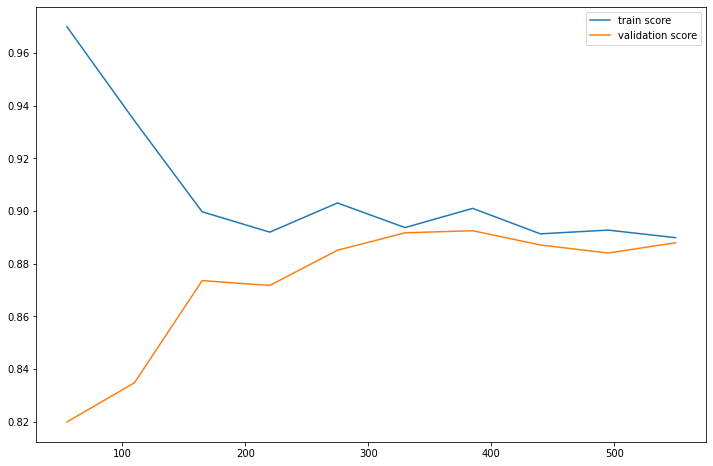

In [264]:
evaluation(model)

## Precision Recall Curve

In [260]:
from sklearn.metrics import precision_recall_curve

In [265]:
precision, recall, threshold = precision_recall_curve(y_test, model.decision_function(X_test))

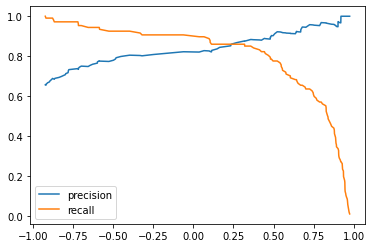

In [266]:
plt.plot(threshold, precision[:-1], label='precision')
plt.plot(threshold, recall[:-1], label='recall')
plt.legend()

In [270]:
def model_final(model, X, threshold=0):
    return model.decision_function(X) > threshold

In [ ]:
y_pred = model_final(model, X_test, threshold=-0.25)
 

In [271]:
from sklearn.metrics import recall_score

In [272]:
# moyenne harmonique de la précision et du rappel,
f1_score(y_test, y_pred)

0.854625550660793

In [273]:
recall_score(y_test, y_pred)

0.9065420560747663

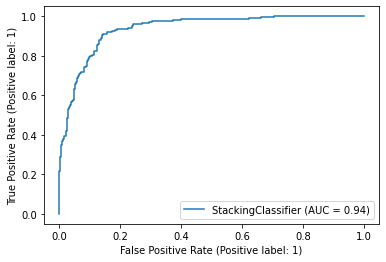

In [277]:
from sklearn import metrics
from matplotlib import pyplot as plt

metrics.plot_roc_curve(model, X_train, y_train)